In [ ]:
## Import Simulation Function Library
import sys
import os
path = 'C:/Users/fritz/Google Drive/Graduate School/Research/Data Analysis/Code'
sys.path.append(path) 
from RetinaOptLib import *
%matplotlib notebook


In [ ]:
## For loading Data
#img_data = load_data('img_data_19-08-31_14-02.dat')
#sim_data = load_data('sim_data_optimal_19-08-31_14-02.dat')

#img_data = load_data('waterfall_img_data_19-09-01_19-18.dat')
#sim_data = load_data('waterfall_sim_data_optimal_19-09-01_19-18.dat')

data_set = load_data('pic_sweep_data_set_19-09-01_23-33.dat')

# stim_sweep_data = load_data('stim_sweep_data_19-08-31_17-05.dat')

In [ ]:
## load Dictionary Data stored in 'dict.mat'
# dict.mat is piece 2015-11-09-03,  Stixel 8, Eccentricity 20 deg

In [ ]:
## save data
# save_data(img_data,'waterfall_img_data')
# save_data(sim_data,'waterfall_sim_data_optimal')
#save_data(stim_sweep_data,'waterfall_stim_sweep_data')
save_data(data_set,'pic_sweep_data_set')

In [ ]:
## 1) How does the choice of error metric change optimal cellular activity during linear reconstruction?
    
#     a) Single Image Analysis:
#         - Reconstructed Image Comparison: Is there a perceivable difference in reconstructed Image?
#         - Activity: 
#             i) Is there a difference in which cells are selected in terms of angle?
#             ii) What are the total number of spikes required by each algo


#     b) Multi-Image Analysis:
#         - Activit|y:
#             i) Display the optimal activity angle relative to MSE for wMSE and SSIM reconstructions
#             ii) Histogram of total number of spikes required over all images for each metric


# 2) Distortion: How do the activities change when total spikes are limited? 

#         a) Error Metric Analysis: For each metric, plot the error of each reconstruction versus num of allowed spikes averaged over all images
#             i) Where do the metric diverge? What do the reconstructions look like? 


#         b) Activity Analysis:  How different is distored activity from optimal in terms of angle betweee, n vectors? 
#             i) Over each image reconstruction, calculate the anlge between distorted image activity and optimal activity
#             ii) average over all images
#             iii) plot numStims vs angle for each metric. Does one metric converge to optimal activity faster? 


# 3) Separability: Given a set of cell activities can we separate them into clusters that predict the error metric used?
       
#        a) For each metric, stack the cell activity vectors for thatac metrics into the same matrix and perform pca
       
#        b) Plot each data point/image with color specifying metric (maybe compare to random). See if linearly separable. 



In [ ]:
img = load_raw_img("nature_pic.jpg")
ret_data = load_raw_data('dict2.mat')

plt.imshow(np.reshape(np.sum(ret_data.A,1),(20,20),order='F'),cmap='bone')

In [ ]:
## Simulation to Generate Data

# load & Preprocess Image
img = load_raw_img("nature_pic.jpg")
ret_data = load_raw_data('dict2.mat')

## Run Simulation
run_sim = False
run_conv_sim    = False
run_photo_sweep = True
### Simulation Parameters
pixel_dims = (20,20)  # Pixel Dimensions of Retinal STA 
num_stims = -1    # Number of Allowable stimulations
electrode = False  # Solve for Electrode-Dictionary Reconstruction or Optimal Cellular Activity
max_act  = 100     # Maximum cell activity for time window

### Psychophysical Parameters
smps = 5.5              # Stimulus Monitor Pixel Size in micrometers
stixel_size = 8          # Stixel Size (number of monitor pixels per stimulus pixel)
eccentricity = 20       # Eccentricity from Fovea of Tissue Center
eye_diam = 24            # Diameter of Eye in milimeters
obj_vis_ang = (120,100)   # Size of VIsualField of View (degrees)
L  = 350                # L Luminance (cd/m2) of object
k = 3                   # Psychometric constant (minimum detection signal to noise ratio)
T = 100                 # Integration time of the eye (in msec)
Ng0 = 36000             # RGC Density at fovea (cells/deg^2)
eg  = 3                 # Subject-dependent  Cell Density Constant (deg)
# compute the  visual angle spanned by the electrode array 
elec_vis_ang = get_elec_angs(smps,stixel_size, eye_diam, pixel_dims) 

# pupil diameter (mm)
# for now calculate as function of luminance, in future can be measured directly via eye tracking
pupil_diam  = 5 - 3 * np.tanh( .4*np.log(L*obj_vis_ang[0]*obj_vis_ang[1]/1600))
                             
psych_params = { # psychophysical parameters dictionary
    "L" : L,
    "XO": obj_vis_ang[0], 
    "YO": obj_vis_ang[1],
    "d" : pupil_diam,
    "e" : eccentricity,
    "elec_XO" : elec_vis_ang[0],
    "elec_YO" : elec_vis_ang[1],
    "binocular" : True,
    "k" : k,
    "T" : T/1000,
    "Ng0": Ng0,
    "eg" : eg,
}

sim_params = { # Stimulation Parameters Object
    "A" : ret_data.A,
    "P" : ret_data.P,
    "e_map" : ret_data.e_map,
    "e_locs" : ret_data.e_locs,
    "num_cells" : ret_data.A.shape[1],
    "num_pixels" : ret_data.num_pixels,  
    "pixel_dims" : pixel_dims,
    "num_stims"  : num_stims,
    "max_act"  : max_act
}
selec_dims = get_selection_dims(psych_params,img) 

print('%i x %i degrees of visual angle is %i x %i pixels of the original image.'
      %(elec_vis_ang[0],elec_vis_ang[1],selec_dims[0],selec_dims[1]))


# Run the Simulation 
if run_sim:
    img_data = preprocess_img(img, psych_params, sim_params)
    sim_data    =  metric_compar(img_data,sim_params,psych_params, electrode)
    
if run_conv_sim:
    img_data = preprocess_img(img,psych_params,sim_params)
    stim_sweep_data = num_stim_sweep(img_data,sim_params,psych_params,electrode)
        
if run_photo_sweep:
    data_set = {}
    img_list = os.listdir('./pics')
    num_pics = len(img_list)
    data_set["num_pics"] = num_pics
    for i in np.arange(num_pics):
        img = load_raw_img('./pics/'+img_list[i])
        print('Running Simulation %i/%i'%(i+1, num_pics))
        data_set["img_data_"+str(i)] = preprocess_img(img,psych_params,sim_params)
        data_set["sim_data_"+str(i)] = metric_compar(data_set["img_data_"+str(i)],sim_params,psych_params, electrode)
        


In [ ]:
## single image comparison
%matplotlib notebook
vmax = np.max(img)
vmin = np.min(img)
plt.rcParams["figure.figsize"] = [16,9]
Tidx = 15
imgNum = 980
cmode = 'RMS' #use RMS (standard deviation) contrast for comparison

origIm = np.reshape(img_data.img_set[:,imgNum],pixel_dims,order='F')
mseRec = np.reshape(sim_data.imgs_mse[:,imgNum],pixel_dims,order='F')
wmsRec = np.reshape(sim_data.imgs_wms[:,imgNum],pixel_dims,order='F')
ssmRec = np.reshape(sim_data.imgs_ssm[:,imgNum],pixel_dims,order='F')

plt.figure()
plt.imshow(origIm,cmap='bone',vmax=vmax,vmin=vmin)
plt.axis('off')
plt.title("Original Image, Contrast = %f"%contrast(origIm,cmode))
plt.savefig('Original.jpg',bbox_inches='tight')
plt.show()

plt.figure()
plt.imshow(mseRec,cmap='bone',vmax=vmax,vmin=vmin)
plt.axis('off')
plt.title("MSE Optimal Reconstruction, Contrast = %f"%contrast(mseRec,cmode))
plt.savefig('MSERecons.jpg',bbox_inches='tight')


plt.figure()
plt.imshow(wmsRec,cmap='bone',vmax=vmax,vmin=vmin)
plt.axis('off')
plt.title("wMSE Optimal Reconstruction, Contrast = %f"%contrast(wmsRec,cmode))
plt.savefig('wMSRecons.jpg',bbox_inches='tight')


plt.figure()
plt.imshow(ssmRec,cmap='bone',vmax=vmax,vmin=vmin)
plt.axis('off')
plt.title("SSIM Optimal Reconstruction, Contrast = %f"%contrast(ssmRec,cmode))
plt.savefig('SSMRecons.jpg',bbox_inches='tight')



In [ ]:
## display entire visual scene tiled by reconstructions for each error metric
cmode='rms'

plt.figure()
plt.imshow(img_data.resampled_img,cmap='bone',vmax=vmax,vmin=vmin)
plt.axis('off')
plt.title('Original Visual Scene, Contrast = %f'%contrast(img_data.orig_img,cmode))
plt.savefig('OrigVisScene.jpg',bbox_inches='tight')
plt.show()

plt.figure()
plt.imshow(sim_data.recons_mse,cmap='bone',vmax=vmax,vmin=vmin)
plt.axis('off')
plt.title('MSE-Optimal Reconstructed Visual Scene, Contrast = %f'%contrast(sim_data.recons_mse,cmode))
plt.savefig('MSEVisScene.jpg',bbox_inches='tight')

plt.figure()
plt.imshow(sim_data.recons_wms,cmap='bone',vmax=vmax,vmin=vmin)
plt.axis('off')
plt.title('wMSE-Optimal Reconstructed Visual Scene, Contrast = %f'%contrast(sim_data.recons_wms,cmode))
plt.savefig('wMSVisScene.jpg',bbox_inches='tight')

plt.figure()
plt.imshow(sim_data.recons_ssm,cmap='bone',vmax=vmax,vmin=vmin)
plt.axis('off')
plt.title('SSIM-Optimal Reconstructed Visual Scene, Contrast = %f'%contrast(sim_data.recons_ssm,cmode))
plt.savefig('SSMVisScene.jpg',bbox_inches='tight')

<IPython.core.display.Javascript object>


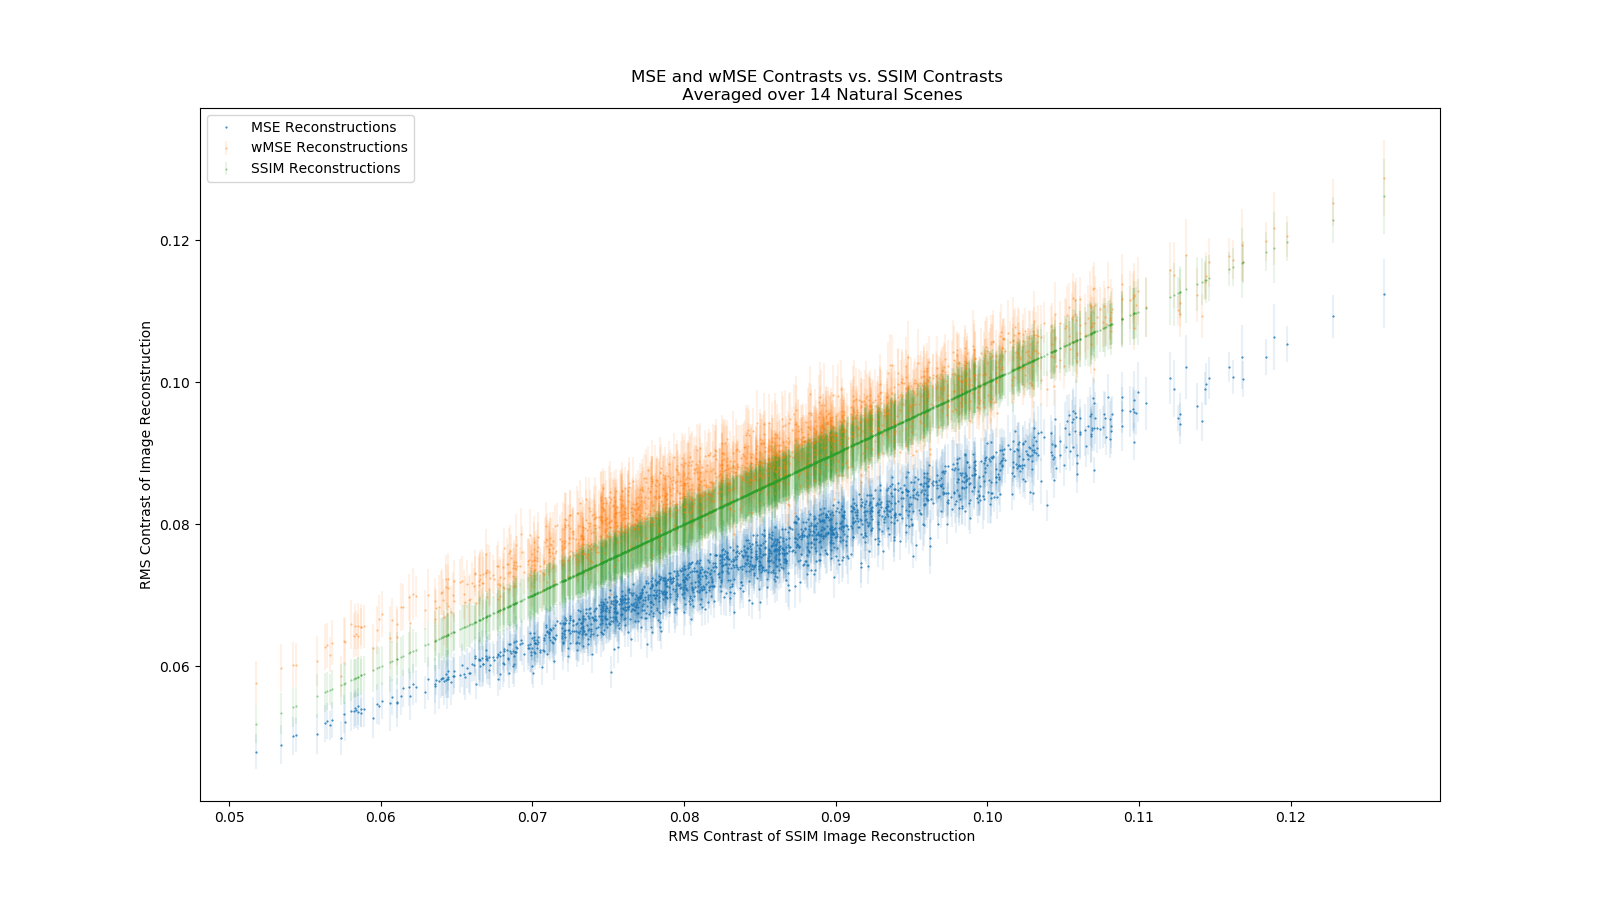

[[1.   0.99 0.98]
 [0.99 1.   0.97]
 [0.98 0.97 1.  ]]
0.004559946808196153
0.010189435206954306


In [80]:
## scatter plot of contrasts

def get_conts_vec(imgs, cont_mode ='rms'):
    # given a set (num_pixel x num_imgs)  of images, return a num_imgs vector of the contrast
    # values for all those images specified by mode
    num_imgs = imgs.shape[1]
    conts = np.zeros((num_imgs,))
    for i in np.arange(num_imgs):
        conts[i] = contrast(imgs[:,i],cont_mode)
    return conts

img_list = os.listdir('./pics')
num_pics = len(img_list)


%matplotlib notebook
#num_pics = data_set['num_pics']
sim_data = data_set["sim_data_0"]
conts_mat_mse = get_conts_vec(sim_data.imgs_mse)
conts_mat_wms = get_conts_vec(sim_data.imgs_wms)
conts_mat_ssm = get_conts_vec(sim_data.imgs_ssm)

for i in np.arange(num_pics-1)+1:
    sim_data = data_set["sim_data_"+str(i)]
    conts_mse = get_conts_vec(sim_data.imgs_mse)
    conts_wms = get_conts_vec(sim_data.imgs_wms)
    conts_ssm = get_conts_vec(sim_data.imgs_ssm)                            
    
    conts_mat_mse = np.vstack((conts_mat_mse,conts_mse))
    conts_mat_wms = np.vstack((conts_mat_wms,conts_wms))
    conts_mat_ssm = np.vstack((conts_mat_ssm,conts_ssm))
    
conts_mse = np.mean(conts_mat_mse, 0)
conts_wms = np.mean(conts_mat_wms, 0)
conts_ssm = np.mean(conts_mat_ssm, 0)

stds_mse = np.std(conts_mat_mse,0) / num_pics
stds_wms = np.std(conts_mat_wms,0) / num_pics
stds_ssm = np.std(conts_mat_ssm,0) / num_pics
                            

a_point = 1
a_errbr = .1
ms = 1
img_nums = np.arange(data_set["img_data_0"].num_imgs)+1


plt.figure(figsize=(16,9))
plt.title("MSE and wMSE Contrasts vs. SSIM Contrasts \n Averaged over 14 Natural Scenes")
plt.xlabel(' RMS Contrast of SSIM Image Reconstruction')
plt.ylabel('RMS Contrast of Image Reconstruction')
line, caps, bars = plt.errorbar(conts_ssm,conts_mse,ms=ms,alpha=a,yerr=stds_mse,marker='.',linestyle="None")
[bar.set_alpha(a_errbr) for bar in bars]
[cap.set_alpha(a_errbr) for cap in caps]
line.set_alpha(a_point)
line.set_label('MSE Reconstructions')
line, caps, bars = plt.errorbar(conts_ssm,conts_wms,label='wMSE Reconstructions',ms=ms,alpha=a,yerr=stds_wms,marker='.',linestyle="None")
[bar.set_alpha(a_errbr) for bar in bars]
[cap.set_alpha(a_errbr) for cap in caps]
line, caps, bars = plt.errorbar(conts_ssm,conts_ssm,label='SSIM Reconstructions',ms=ms,alpha=a,yerr=stds_ssm,marker='.',linestyle="None")
[bar.set_alpha(a_errbr) for bar in bars]
[cap.set_alpha(a_errbr) for cap in caps]
plt.legend()
plt.savefig('conts_vs_ssm.jpg',bbox_inches='tight')


# report correlation coefficients of each variable:
mse_v_wms_v_ssm_conts = np.vstack((conts_mse,conts_wms,conts_ssm))
corr_coeffs = np.corrcoef(mse_v_wms_v_ssm_conts)
print(np.round(corr_coeffs,2))

print(np.sqrt((conts_wms-conts_ssm).T@(conts_wms-conts_ssm)/conts_wms.size))
print(np.sqrt((conts_ssm-conts_mse).T@(conts_ssm-conts_mse)/conts_wms.size))



In [ ]:
## single image cellular activity comparison
plt.figure(figsize= (16,3))
cellNums = np.arange(sim_data.acts_mse[:,imgNum].size) + 1
plt.plot(cellNums,sim_data.acts_mse[:,imgNum],'-',c='r',alpha=.3)
plt.plot(cellNums,sim_data.acts_wms[:,imgNum],'-',c='g',alpha=.3)
plt.plot(cellNums,sim_data.acts_ssm[:,imgNum],'-',c='b',alpha=.3)
plt.plot(cellNums,sim_data.acts_mse[:,imgNum],'.',c='r',label='MSE-Optimal Activity, Total Spikes = %i'%np.sum(sim_data.acts_mse[:,imgNum]))
plt.plot(cellNums,sim_data.acts_wms[:,imgNum],'.',c='g',label='wMSE-Optimal Activity, Total Spikes = %i'%np.sum(sim_data.acts_wms[:,imgNum]))
plt.plot(cellNums,sim_data.acts_ssm[:,imgNum],'.',c='b',label='SSIM-Optimal Activity, Total Spikes = %i'%np.sum(sim_data.acts_ssm[:,imgNum]))
plt.xlabel('Cell Number')
plt.xticks(np.arange(min(cellNums), max(cellNums), 5)+1)
plt.ylabel('Number of Spikes in Optimal Reconstruction')
plt.title('Optimal Cellular Activity for Single Image')
plt.legend()
plt.savefig('SingleImageCellActComp.jpg',bbox_inches='tight')




In [ ]:
#radial plot of image reconstructions 
a = .05
r_lim = 1000
plt.figure(figsize=(10,10))
act_angle_plot(sim_data.acts_mse,sim_data.acts_wms,'wMSE',r_lim, a=a)
plt.savefig('mseVSwmsAng.jpg',bbox_inches='tight')


plt.figure(figsize=(10,10))
act_angle_plot(sim_data.acts_mse,sim_data.acts_ssm,'SSIM',r_lim, a=a)
plt.savefig('mseVSssmAng.jpg',bbox_inches='tight')







In [ ]:
## count number of on parasol cells and off parasol cells spikes for each metric
# do the ratio of cell type selections change according to error metric? 

# #first identify which cells are on and which are off
# # On = cells 0 - 39, off = cells 40::
# off_cell_start = 40
# # then go through each image activity and calculate the number of on spikes and number of off spikes
# spikes_on_mse = np.zeros((imgData.numImgs,))
# spikes_off_mse = np.zeros((imgData.numImgs,))

# spikes_on_ssm = np.zeros((imgData.numImgs,))
# spikes_off_ssm = np.zeros((imgData.numImgs,))

# spikes_on_wms = np.zeros((imgData.numImgs,))
# spikes_off_wms = np.zeros((imgData.numImgs,))
# for i in np.arange(imgData.numImgs):
#     spikes_on_mse[i] = np.sum(simData.mseActs[0:off_cell_start-1,i])
#     spikes_off_mse[i]  =  np.sum(simData.mseActs[off_cell_start:,i])

#     spikes_on_wms[i] = np.sum(simData.wmsActs[0:off_cell_start-1,i])
#     spikes_off_wms[i]  =  np.sum(simData.wmsActs[off_cell_start:,i])
      
#     spikes_on_ssm[i] = np.sum(simData.ssmActs[0:off_cell_start-1,i])
#     spikes_off_ssm[i]  =  np.sum(simData.ssmActs[off_cell_start:,i])
    
# #  # for an image, calculate the ratio of on to off, do so for all images, for all error metric sets,
# plt.figure()
# plt.scatter(spikes_on_mse,spikes_off_mse,label="MSE",alpha=.5)
# plt.scatter(spikes_on_wms,spikes_off_wms,label="wMSE",alpha=.5)
# plt.scatter(spikes_on_ssm,spikes_off_ssm,label="SSIM",alpha=.5)
# plt.legend()

# ratio_mse = np.divide(spikes_on_mse, spikes_off_mse)
# ratio_wms = np.divide(spikes_on_wms, spikes_off_wms)
# ratio_ssm = np.divide(spikes_on_ssm, spikes_off_ssm)

# plt.figure()
# plt.scatter(ratio_mse,ratio_wms,label='MSE vs WMS Ratio',alpha=.1)
# plt.scatter(ratio_mse,ratio_ssm,label='MSE vs SSIM Ratio',alpha=.1)

# or, for each image, calculate ratio ssim/wmse on to mse on, and ratio ssim/wmse off to mse off and plot on scatter axis.
# on_ratio_mse_ssm = np.divide(spikes_on_ssm,spikes_on_mse)

# off_ratio_mse_ssm = np.divide(spikes_off_ssm,spikes_off_mse)
# plt.figure()
# plt.scatter(on_ratio_mse_ssm)
# #plt.scatter(on_ratio_mse_ssm,off_ratio_mse_ssm,alpha=.2,label='SSIM / ')

# # on_ratio_mse_wms = np.divide(spikes_on_wms,spikes_on_mse)
# # off_ratio_mse_wms = np.divide(spikes_off_wms,spikes_off_mse)
# # plt.scatter(on_ratio_mse_wms,off_ratio_mse_wms,alpha=.2)
# plt.show()



In [ ]:
## spike divergence histograms


plt.figure(figsize=(16,9))

sums_mse = np.sum(sim_data.acts_mse,0)
sums_ssm = np.sum(sim_data.acts_ssm,0)
percs_ssm = 100*np.divide(sums_ssm-sums_mse,sums_mse)
bins = np.linspace(0, 250, 100)
plt.hist(percs_ssm,bins=bins,label="Average = %f"%np.mean(percs_ssm),alpha=1,color="black")
plt.axvline(x=np.mean(percs_ssm),color='black')
plt.title('Histogram of SSIM-MSE Spike Divergence Across Image Set',fontSize=18)
plt.xlabel('Percent Difference of Total Spikes',fontsize=18)
plt.ylabel('Number of Images',fontsize=18)
plt.legend()
plt.savefig('divergence_hist_mse_ssm.jpg',bbox_inches='tight')
plt.show()
    

plt.figure()
sums_mse = np.sum(sim_data.acts_mse,0)
sums_wms = np.sum(sim_data.acts_wms,0)
percs_wms = 100*np.divide(sums_wms-sums_mse,sums_mse)
bins = np.linspace(0, 250, 100)
plt.hist(percs_wms,bins=bins,label="Average = %f"%np.mean(percs_wms),alpha=1,color="black")
plt.axvline(x=np.mean(percs_wms),color='black')
plt.title('Histogram of wMSE-MSE Spike Divergence Across Image Set',fontSize=18)
plt.xlabel('Percent Difference of Total Spikes',fontsize=18)
plt.ylabel('Number of Images',fontsize=18)
plt.legend()
plt.savefig('divergence_hist_mse_wms.jpg',bbox_inches='tight')
plt.show()




In [ ]:
## total number of spikes for each image for each metric,
img_list = os.listdir('./pics')
num_pics = len(img_list)


%matplotlib notebook
#num_pics = data_set['num_pics']
sim_data = data_set["sim_data_0"]
spikes_mat_mse = np.sum(sim_data.acts_mse,0)
spikes_mat_wms = np.sum(sim_data.acts_wms,0)
spikes_mat_ssm = np.sum(sim_data.acts_ssm,0)
for i in np.arange(num_pics-1)+1:
    sim_data = data_set["sim_data_"+str(i)]
    spikes_mse = np.sum(sim_data.acts_mse,0)
    spikes_wms = np.sum(sim_data.acts_wms,0)
    spikes_ssm = np.sum(sim_data.acts_ssm,0)
                            
    spikes_mat_mse = np.vstack((spikes_mat_mse,spikes_mse))
    spikes_mat_wms = np.vstack((spikes_mat_wms,spikes_wms))
    spikes_mat_ssm = np.vstack((spikes_mat_ssm,spikes_ssm))
    
spikes_mse = np.mean(spikes_mat_mse, 0)
spikes_wms = np.mean(spikes_mat_wms, 0)
spikes_ssm = np.mean(spikes_mat_ssm, 0)

stds_mse = np.std(spikes_mat_mse,0) / num_pics
stds_wms = np.std(spikes_mat_wms,0) / num_pics
stds_ssm = np.std(spikes_mat_ssm,0) / num_pics
                            

a_point = 1
a_errbr = .1
ms = 1
img_nums = np.arange(data_set["img_data_0"].num_imgs)+1


plt.figure(figsize=(16,9))
plt.title("MSE and wMSE Spike Totals vs. SSIM Spike Totals \n Averaged over 14 Natural Scenes")
plt.xlabel('Number of Spikes for SSIM Image Reconstruction')
plt.ylabel('Number of Spikes Required for Image Reconstruction')
line, caps, bars = plt.errorbar(spikes_ssm,spikes_mse,ms=ms,alpha=a,yerr=stds_mse,marker='.',linestyle="None")
[bar.set_alpha(a_errbr) for bar in bars]
[cap.set_alpha(a_errbr) for cap in caps]
line.set_alpha(a_point)
line.set_label('MSE Reconstructions')
line, caps, bars = plt.errorbar(spikes_ssm,spikes_wms,label='wMSE Reconstructions',ms=ms,alpha=a,yerr=stds_wms,marker='.',linestyle="None")
[bar.set_alpha(a_errbr) for bar in bars]
[cap.set_alpha(a_errbr) for cap in caps]
line, caps, bars = plt.errorbar(spikes_ssm,spikes_ssm,label='SSIM Reconstructions',ms=ms,alpha=a,yerr=stds_ssm,marker='.',linestyle="None")
[bar.set_alpha(a_errbr) for bar in bars]
[cap.set_alpha(a_errbr) for cap in caps]
plt.legend()
plt.savefig('num_spikes_sorted_ssm.jpg',bbox_inches='tight')


# report correlation coefficients of each variable:
mse_v_wms_v_ssm_acts = np.vstack((spikes_mse,spikes_wms,spikes_ssm))
corr_coeffs = np.corrcoef(mse_v_wms_v_ssm_acts)
print(np.round(corr_coeffs,2))

print(np.sqrt((spikes_wms-spikes_ssm).T@(spikes_wms-spikes_ssm)/spikes_wms.size))
print(np.sqrt((spikes_ssm-spikes_mse).T@(spikes_ssm-spikes_mse)/spikes_wms.size))


<IPython.core.display.Javascript object>


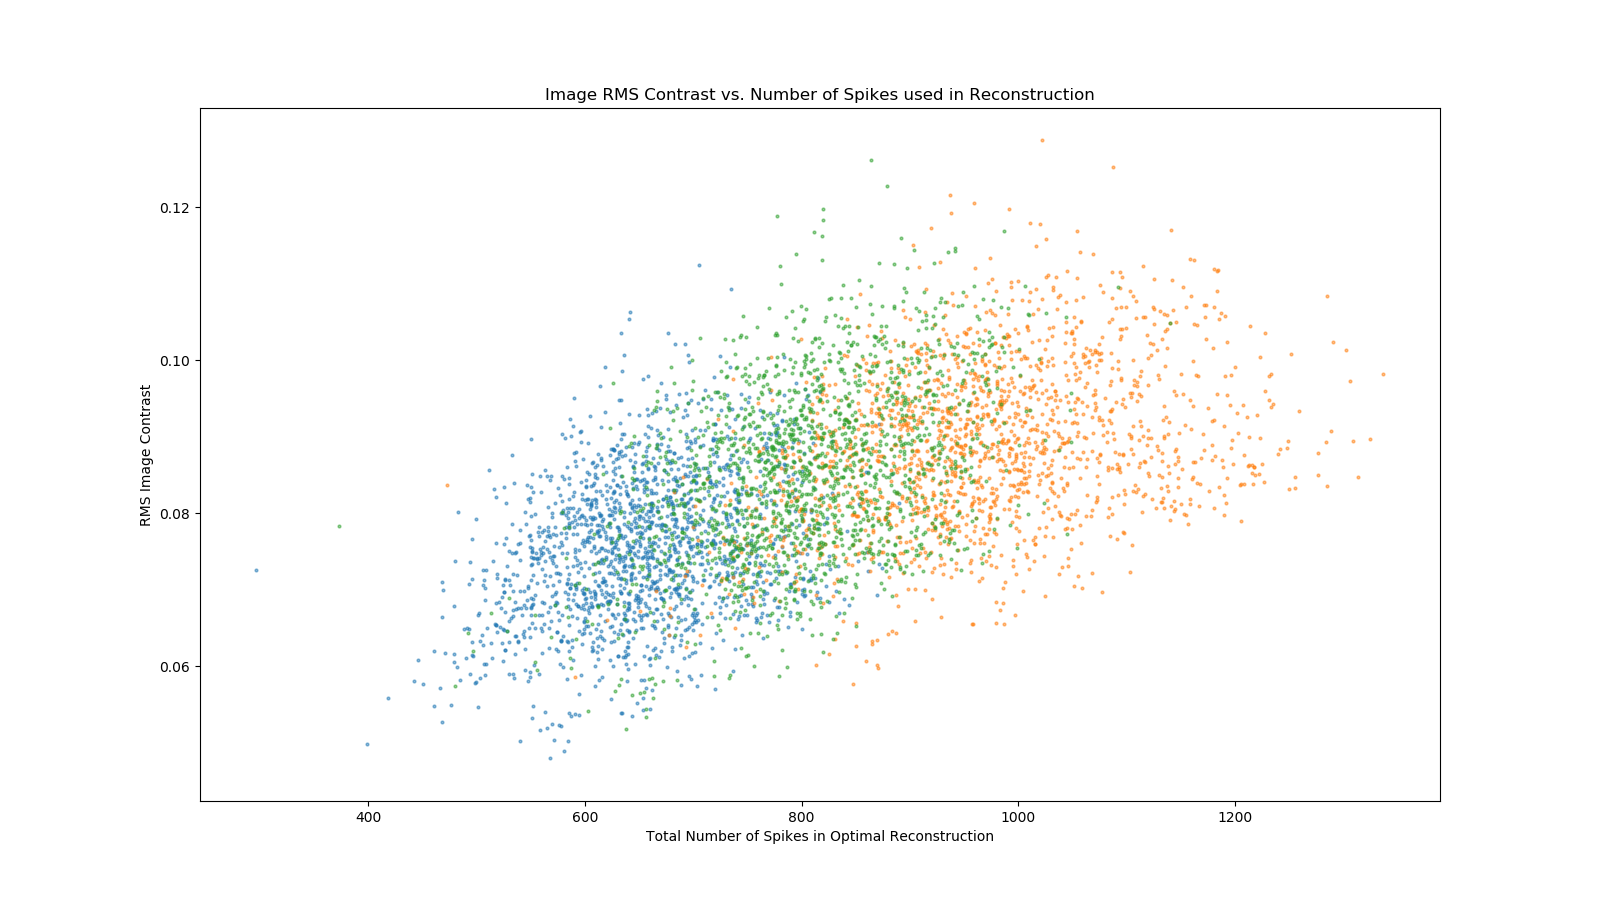

[[1.         0.31367397]
 [0.31367397 1.        ]]
[[1.         0.34037279]
 [0.34037279 1.        ]]
[[1.         0.42592023]
 [0.42592023 1.        ]]


In [98]:
## plot contrast/ numspikes for each metric


a = .5
s = 4
plt.figure(figsize=(16,9))
plt.scatter(spikes_mse,conts_mse,label='MSE',alpha=a,s=s)
plt.scatter(spikes_wms,conts_wms,label='wMSE',alpha=a,s=s)
plt.scatter(spikes_ssm,conts_ssm,label='SSIM',alpha=a,s=s)
plt.show()


plt.title('Image RMS Contrast vs. Number of Spikes used in Reconstruction')
plt.xlabel('Total Number of Spikes in Optimal Reconstruction')
plt.ylabel('RMS Image Contrast')
plt.savefig('Contrast_vs_num_spikes.jpg',bbox_inches='tight')
plt.show()


mse_corr = np.corrcoef(np.vstack((spikes_mse,conts_mse)))
wms_corr = np.corrcoef(np.vstack((spikes_wms,conts_wms)))
ssm_corr = np.corrcoef(np.vstack((spikes_ssm,conts_ssm)))
print(mse_corr)
print(wms_corr)
print(ssm_corr)

In [ ]:
# ## remove top percentile spike diverging images from scene for wMSE and SSIM and compare
diffs_mse_ssm = sums_ssm-sums_mse
diffs_mse_wms = sums_wms-sums_mse
threshold = 400 

diff_ssm = []
diff_wms = []
for i in np.arange(img_data.num_imgs):
    if diffs_mse_ssm[i] < threshold:
        diff_ssm.append(i)
    if diffs_mse_wms[i] < threshold:
        diff_wms.append(i)
        
        
ssm_copy = copy.deepcopy(img_data.orig_img)
wms_copy = copy.deepcopy(img_data.orig_img)

# remove diff_ssm image sfrom ssm_copy
dx = 34
dy = dx
for i in np.arange(len(diff_ssm)):
    x = int(img_data.xs[diff_ssm[i]])
    y = int(img_data.ys[diff_ssm[i]])
    ssm_copy[x:x+dx,y:y+dy] = 1
    
for i in np.arange(len(diff_wms)):
    x = int(img_data.xs[diff_wms[i]])
    y = int(img_data.ys[diff_ssm[i]])
    wms_copy[x:x+dx,y:y+dy] = 1

plt.figure()
plt.imshow(ssm_copy,cmap='bone',vmax=vmax,vmin=vmin)
plt.show()

plt.figure()
plt.imshow(wms_copy,cmap='bone',vmax=vmax,vmin=vmin)
plt.show()


In [ ]:
# spike divergence versus reference image contrast scatter plot
diffs_mse_ssm = sums_ssm-sums_mse
diffs_mse_wms = sums_wms-sums_mse

# for each image, 
conts_ref = np.zeros((img_data.num_imgs,))
for i in np.arange(img_data.num_imgs):
    # calculate the rms contrast of the reference image
    conts_ref[i] = contrast(img_data.img_set[:,i],'rms')

    
# scatter plot 
plt.figure()
plt.scatter(conts_ref,diffs_mse_ssm,label='SSIM Reconstructions')
plt.scatter(conts_ref,diffs_mse_wms,label='wMSE Reconstruction')
plt.show()

In [ ]:
## relative error vs number of allowed stimulations 
plt.figure()
plot_stim_comparison(img_data, stim_sweep_data, "MSE", psych_params, (20,20))
plt.savefig("RelativeMSEConv.jpg",bbox_inches='tight')

plt.figure()
plot_stim_comparison(img_data, stim_sweep_data, "wMS", psych_params, (20,20))
plt.savefig("RelativewMSConv.jpg",bbox_inches='tight')

plt.figure()
plot_stim_comparison(img_data, stim_sweep_data, "SSIM", psych_params, (20,20))
plt.savefig("RelativeSSMConv.jpg",bbox_inches='tight')


In [ ]:
## single image comparison for numStims ~ 500

Tidx = 6
img_num = 980

origIm = np.reshape(img_data.img_set[:,img_num],pixel_dims,order='F')
mseRec = np.reshape(stim_sweep_data.img_set_mse[Tidx,:,img_num],pixel_dims,order='F')
wmsRec = np.reshape(stim_sweep_data.img_set_wms[Tidx,:,img_num],pixel_dims,order='F')
ssmRec = np.reshape(stim_sweep_data.img_set_ssm[Tidx,:,img_num],pixel_dims,order='F')

plt.figure()
plt.imshow(origIm,cmap='bone',vmax=.5,vmin=-.5)
plt.axis('off')
plt.title("Original Image")
plt.savefig('OriginalDistorted.jpg',bbox_inches='tight')
plt.show()


plt.figure()
plt.imshow(mseRec,cmap='bone',vmax=.5,vmin=-.5)
plt.axis('off')
plt.title("MSE Distorted Reconstruction")
plt.savefig('MSEReconsDistorted.jpg',bbox_inches='tight')


plt.figure()
plt.imshow(wmsRec,cmap='bone',vmax=.5,vmin=-.5)
plt.axis('off')
plt.title("wMSE Distorted Reconstruction")
plt.savefig('wMSReconsDistorted.jpg',bbox_inches='tight')


plt.figure()
plt.imshow(ssmRec,cmap='bone',vmax=.5,vmin=-.5)
plt.axis('off')
plt.title("SSIM Distorted Reconstruction")
plt.savefig('SSMReconsDistorted.jpg',bbox_inches='tight')



In [ ]:
## display entire distorted visual scene tiled by reconstructions for each error metric
plt.figure()
plt.imshow(img_data.resampled_img,cmap='bone',vmax=vmax,vmin=vmin)
plt.axis('off')
plt.title('Original Visual Scene')
plt.savefig('OrigVisSceneDist.jpg',bbox_inches='tight')
plt.show()

plt.figure()
plt.imshow(stim_sweep_data.rec_set_mse[Tidx],cmap='bone',vmax=vmax,vmin=vmin)
plt.axis('off')
plt.title('MSE-Distorted Reconstructed Visual Scene')
plt.savefig('MSEVisSceneDist.jpg',bbox_inches='tight')

plt.figure()
plt.imshow(stim_sweep_data.rec_set_wms[Tidx],cmap='bone',vmax=vmax,vmin=vmin)
plt.axis('off')
plt.title('wMSE-Distorted Reconstructed Visual Scene')
plt.savefig('wMSVisSceneDist.jpg',bbox_inches='tight')

plt.figure()
plt.imshow(stim_sweep_data.rec_set_ssm[Tidx],cmap='bone',vmax=vmax,vmin=vmin)
plt.axis('off')
plt.title('SSIM-Dist Reconstructed Visual Scene')
plt.savefig('SSMVisSceneDist.jpg',bbox_inches='tight')

In [ ]:
## plot the frequency weighting mask
XO = psychParams["XO"]

psychParams["e"] = 20
N  =  int(imgData.origImg.shape[0]/imgData.sDims[0]) # number of selection blocks (number of samples of DC terms of each subImage)
offset = (1/2) * (N / XO)
Wp = csf(psychParams,pixelDims,offset=offset) #offset frequency b


sfRes = 1/20
ppd = 20/psychParams["elecXO"]
fs = (sfRes * ppd *(np.arange(20) )) + offset
fs = np.round(fs,1)
ticks = np.arange(0,20,4)
labels = fs[np.arange(0,20,4)]
      
plt.figure(figsize=(10,10))
plt.imshow(Wp,cmap='bone',vmax=10,vmin=0)
plt.xticks(ticks,labels)
plt.yticks(ticks,labels)
plt.xlabel('Horizontal Spatial Frequency (cpd)')
plt.ylabel('Vertical Spatial Frequency (cpd)')
plt.colorbar()
plt.show()